In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [2]:
X = mnist.data
y = mnist.target

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [6]:
import numpy as np
some_digit = np.array(X.iloc[0])
some_digit_image = some_digit.reshape(28,28)
some_digit_image

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

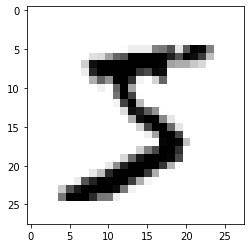

In [7]:
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary,interpolation = "nearest")


In [8]:
y[0]

'5'

In [10]:
y = y.astype(np.int8)
y[0]

5

In [16]:
def plot_digits(instances,images_per_row):
    size = 28
    n_rows = (len(instances)-1) // images_per_row + 1
    n_empty_spaces = (n_rows * images_per_row) - len(instances)
    padded_instances = np.concatenate([instances,np.zeros((n_empty_spaces,size*size))],axis = 0)
    image_grid = padded_instances.reshape(n_rows,images_per_row,size,size)
    print(image_grid.shape)
    big_image = image_grid.transpose(0,2,1,3).reshape((n_rows*size,images_per_row*size))
    plt.imshow(big_image,cmap = plt.cm.binary,interpolation = "nearest")
    plt.axis("off")

(11, 10, 28, 28)


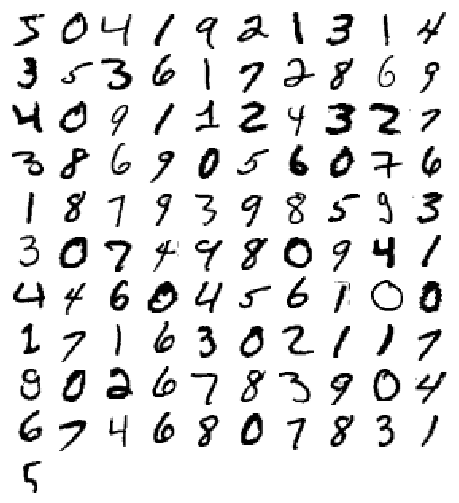

In [17]:
plt.figure(figsize = (9,9))
example_images = X.loc[:100]
plot_digits(example_images,10)
plt.show()

In [18]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

### 5 Detector

In [19]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [21]:
import warnings
FutureWarning('ignore')

FutureWarning('ignore')

In [23]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(tol = 0.1)
clf.fit(X_train,y_train_5)

C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [24]:
clf.predict([some_digit])

array([ True])

In [25]:
clf.predict([X.iloc[5]])

array([False])

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X_train,y_train_5,cv = 3,scoring = 'accuracy')

C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

array([0.97525, 0.97325, 0.9732 ])

In [28]:
from sklearn.base import BaseEstimator
class not5(BaseEstimator):
    def fit(self,X,y = None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype = bool)

In [29]:
not_5_clf = not5()
cross_val_score(not_5_clf,X_train,y_train_5,cv = 3,scoring = "accuracy")

array([0.91125, 0.90855, 0.90915])

In [34]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf,X_train,y_train_5,cv = 3)

C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

In [35]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [36]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_train_5,y_train_pred)
con_matrix

array([[54039,   540],
       [ 1026,  4395]], dtype=int64)

In [39]:
import pandas as pd
con_matrix_df = pd.DataFrame({"Guessed not 5(-)":con_matrix[:,0],"Guessed 5(+)":con_matrix[:,1]},index = ["not 5","5"])
con_matrix_df

,Guessed not 5(-),Guessed 5(+)
not 5,54039,540
5,1026,4395


In [ ]:
con